In [15]:
import evolocity as evo
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

## Pre-computed Global Evolutionary Vector Field Example for Influenza A Nucleoprotein

In [2]:
adata = evo.datasets.nucleoprotein()
adata

  0%|          | 0.00/21.7M [00:00<?, ?B/s]

AnnData object with n_obs × n_vars = 3304 × 1280
    obs: 'n_seq', 'seq', 'gene_id', 'embl_id', 'subtype', 'year', 'date', 'country', 'host', 'resist_adamantane', 'resist_oseltamivir', 'virulence', 'transmission', 'seqlen', 'homology', 'gong2013_step', 'louvain'
    uns: 'louvain', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

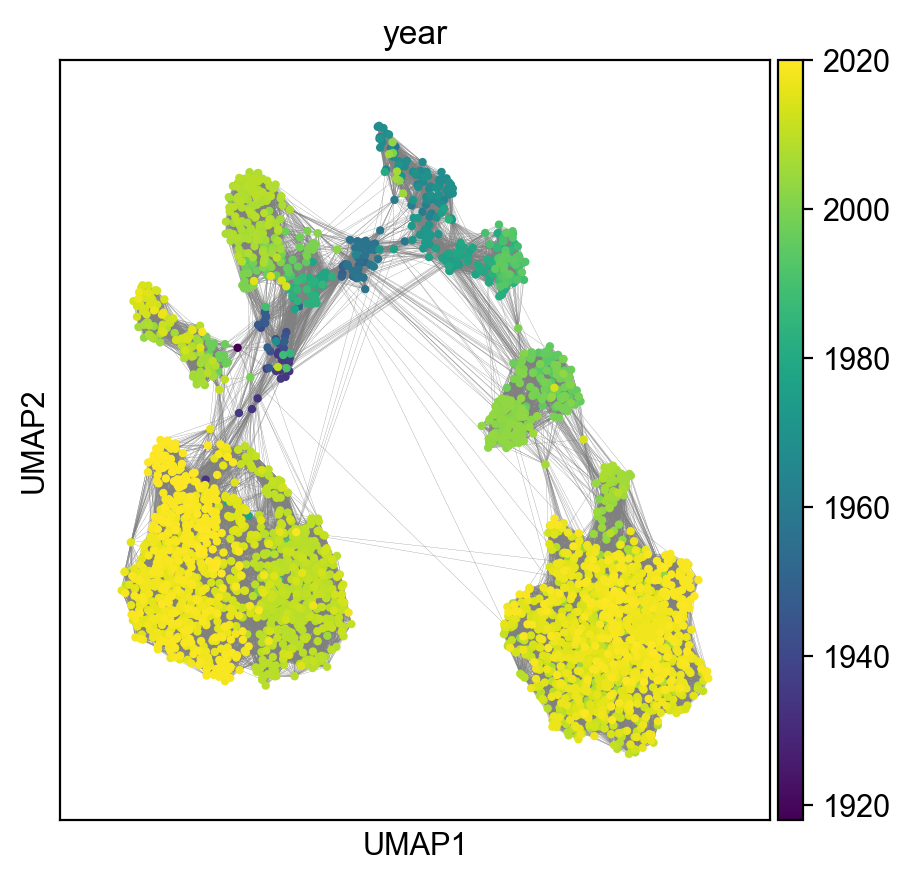

In [3]:
evo.set_figure_params(dpi_save=500, figsize=(5, 5))
sc.pl.umap(adata, color='year', edges=True,)

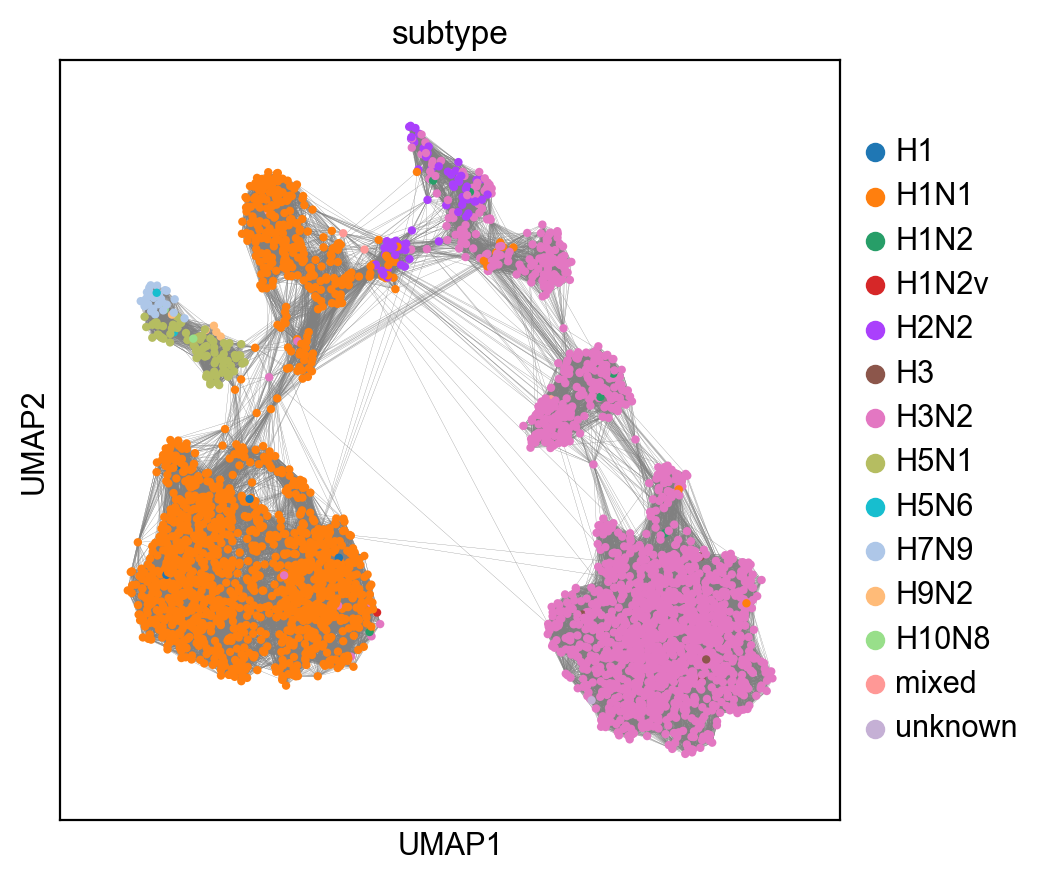

In [4]:
sc.pl.umap(adata, color='subtype', edges=True,)

## Learning Local Evolution Rules

In [21]:
# !python -m pip install evolocity
# !pip install biopython
import evolocity as evo
import scanpy as sc

# Note: evovelocity relies on an older version of biopython which assumes Bio.SubsMat instead of Bio.Align.substitution_matrices
# Usage of substition matrices have been updated in evolocity\tools\velocity_graph.py lines at 13, 196 and 197

In [22]:
 reference_protein = 'TTSAGESADPVTATVENYGGETQVQRRQHTDIAFILDRFVKVKPKEQVNVLDLMQIPAHTLVGALLRTATYYFSDLELAVKHEGDLTWVPNGAPETALDNTTNPTAYHKEPLTRLALPYTAPHRVLATVYNGSSKYGDTSTNNVRGDLQVLAQKAERTLPTSFNFGAIKATRVTELLYRMKRAETYCPRPLLAIQPSDARHKQRIVAPAKQ'

In [23]:
# Load sequences and compute language model embeddings.
adata = evo.pp.featurize_seqs(reference_protein)

Embedding sequence batch 1 / 1


In [24]:
# Note: evovelocity relies on an older version of scanpy that uses write_knn_indices as an argument for compute_neighbours which is now depracated
# Usage of this argument has been removed at evolocity\preprocessing\neighbors.py:163

# Construct sequence similarity network.
evo.pp.neighbors(adata)

computing neighbors
    finished (0:00:28) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


In [5]:
# Note: evovelocity relies on an older version of scipy which assumes a coo_matrix has a .A attribute which it no longer has 
# Usage of this has been changed such that toarray() is used instead of A to convert to dense array
# at evolocity\tools\velocity_graph.py:399, transition_matrix.py:99 and velocity_embedding.py:152

# Run evolocity analysis.
evo.tl.velocity_graph(adata)
# Embed network and velocities in two-dimensions and plot.
sc.tl.umap(adata)
evo.tl.velocity_embedding(adata)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:09<00:00,  2.14it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 291.77it/s]



computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


n_obs = 20
n_neighbours = 1


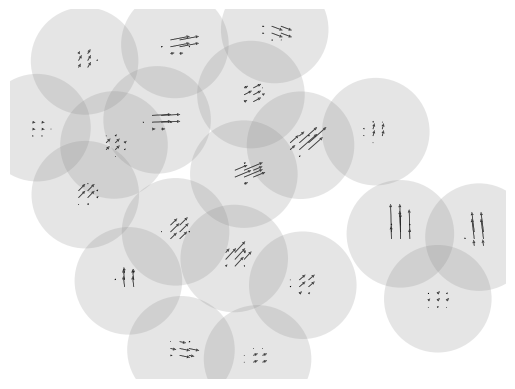

In [6]:
# Note 1: evovelocity requires a minimum of 50 observations, whereas the fmd sequence only results in 20
# Usage has been updated such that a minimum of 20 is used resulting in 1 neighbour at evolocity\plotting\velocity_embedding_grid.py:50
# Note 2: evovelocity relies on an outdated version of matplotlib which makes use of the now deprecated gca()
# Usage has been updated to replace with add_subplot() with argument projection at evolocity\plotting\utils.py:114
# Note 3: evovolecity relies on an outdated version of pandas which makes use of is_categorical imported from the wrong folder as it has now been refactored
# Usage has now been updated such that location is pandas.core.dtypes.common vs pandas.api.types and is_categorical_dtype vs is_categorical at evolocity\plotting\utils.py:50
evo.pl.velocity_embedding_grid(adata)

n_obs = 20
n_neighbours = 1


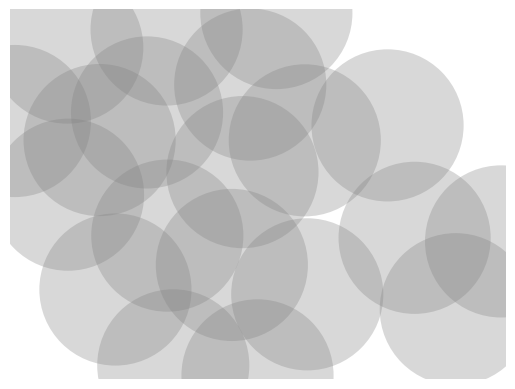

In [7]:
evo.pl.velocity_embedding_stream(adata)

# Interpretation of results


In [2]:
# Creating FMD historical dataset
from Bio import SeqIO, Entrez
import evolocity as evo
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [3]:
Entrez.email = "agubaubrey@protonmail.com"

# Data Source: https://ars.els-cdn.com/content/image/1-s2.0-S101684782307200X-mmc1-molce-sup01.pdf
# ["AY593786","AY593770","AY593785","AY593782","AY593783"]
accession_no_list = ["KX784486","KX784485","JQ266911"]

def fetchIsolateRecord(accession_no):
    handle = Entrez.efetch(db="nucleotide", id=accession_no, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    return record

def buildSeqList(accession_no_list):
    seq_list = []
    for accession_no in accession_no_list:
        record = fetchIsolateRecord(accession_no)
        seq = record.seq
        seq_list.append(seq)
    return seq_list

seq_list = buildSeqList(accession_no_list)
seq_list

[Seq('TGACACCACTCAGGACCGCCGTAAGCAGGAGATCATTGCACCTGAGAAGCAGAT...CGG'),
 Seq('TGACACCACTCAGGACCGCCGTAAGCAGGAGATCATTGCACCTGAGAAGCAGAT...GTG'),
 Seq('GACACTTCCACATGGATTATGGAACTGGGTTTTACAAACCTGTGATGGCCTCGA...ATC')]

In [4]:
seq_lengths = [len(seq) for seq in seq_list]
print("Sequence lengths:", seq_lengths)


Sequence lengths: [211, 211, 211]


In [5]:
# Load sequences and compute language model embeddings.
adata = evo.pp.featurize_seqs(seq_list) 

Embedding sequence batch 1 / 1


In [6]:
# Construct sequence similarity network.
evo.pp.neighbors(adata,n_neighbors=2) # defaul n_neighbors = 50 

computing neighbors
    finished (0:00:47) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


In [8]:
# Run evolocity analysis.
evo.tl.velocity_graph(adata)
# Embed network and velocities in two-dimensions and plot.
sc.pp.neighbors(adata, n_neighbors=2) # to set neighbours to a low value
sc.tl.umap(adata)
evo.tl.velocity_embedding(adata)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x0000020E878AE3D0>>
Traceback (most recent call last):
  File "C:\Users\aguba\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 790, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
                                                 ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aguba\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1494, in enumerate
    def enumerate():
    
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
evo.pl.velocity_embedding_grid(adata)